# About Dataset - Combined Cycle Power Plant

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.

Attribute Information:
Features consist of hourly average ambient variables

* Temperature (T) in the range 1.81°C and 37.11°C,
* Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
* Relative Humidity (RH) in the range 25.56% to 100.16%
* Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
* Net hourly electrical energy output (EP) 420.26-495.76 MW
* The averages are taken from various sensors located around the plant that record the ambient variables every second. * The variables are given without normalization.

https://www.kaggle.com/datasets/gova26/airpressure

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='ticks')

df = pd.read_csv('../DataBases/Public Industrial Datasets/Combined Cycle Power Plant/CombinedCyclePowerPlant.csv')

In [3]:
#Renaming Columns for a better readability
df.columns = ['Temperature','Exhaust Vacuum','Atm. Pressure','Relative Humidty','Energy Produced (mWh)']

#Let's check df info
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temperature            9568 non-null   float64
 1   Exhaust Vacuum         9568 non-null   float64
 2   Atm. Pressure          9568 non-null   float64
 3   Relative Humidty       9568 non-null   float64
 4   Energy Produced (mWh)  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB
None
(9568, 5)


In [4]:
## dropping duplicate rows if exists
df.drop_duplicates(inplace=True)
print(df.shape)

(9527, 5)


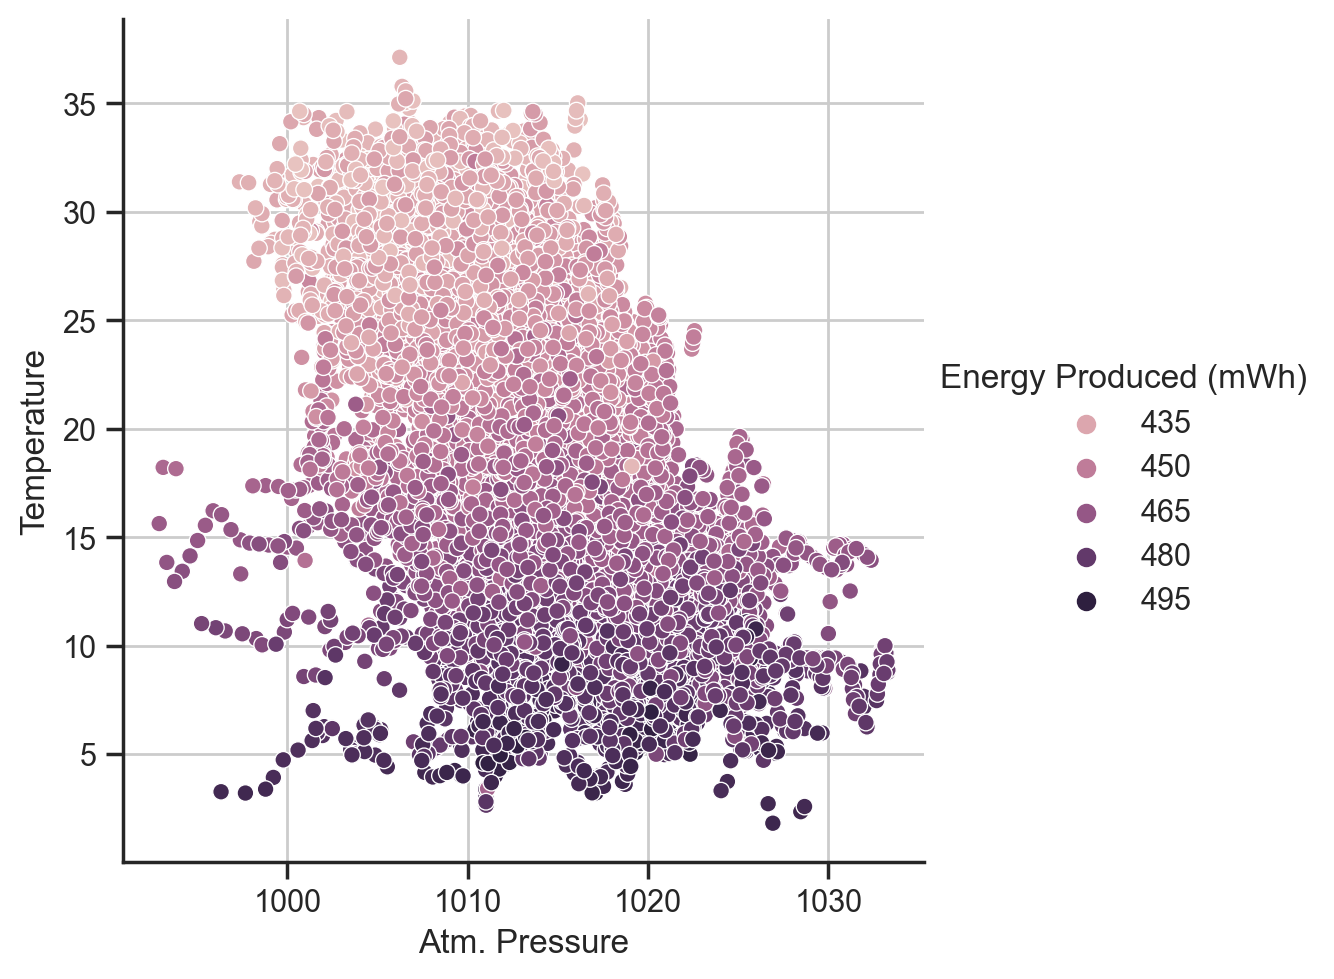

In [100]:
sns.relplot(data=df,x='Atm. Pressure',y='Temperature', hue='Energy Produced (mWh)')
plt.grid(True)
plt.show()
plt.rcParams['figure.figsize'] = [18, 12]
plt.rcParams['figure.dpi'] = 200

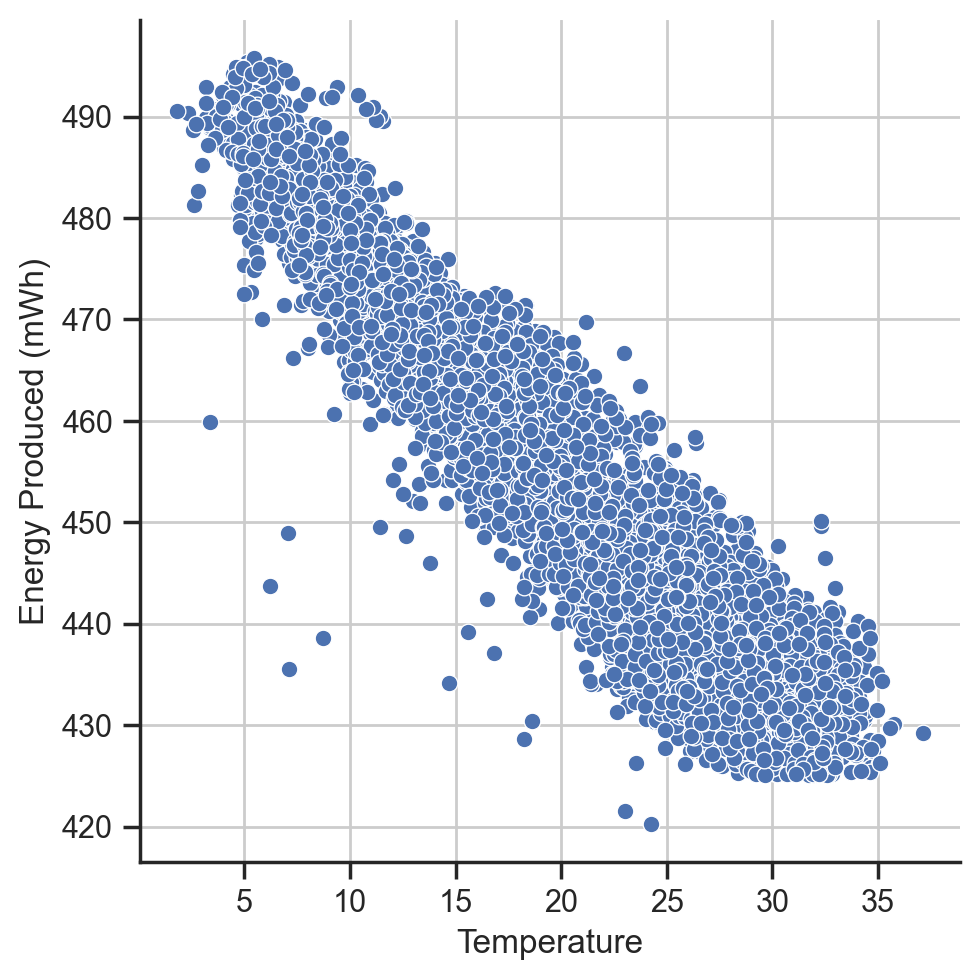

In [98]:
## it looks like there is a negative correlation between Temperature and Energy 
sns.relplot(data=df,x='Temperature', y='Energy Produced (mWh)')
plt.grid(True)
plt.show()
plt.rcParams['figure.figsize'] = [18, 12]
plt.rcParams['figure.dpi'] = 200
%matplotlib inline

In [90]:
## Let's check columns correlated with Energy Column since it is our target value
print(df.corr()['Energy Produced (mWh)'])

Temperature             -0.947908
Exhaust Vacuum          -0.869900
Atm. Pressure            0.518687
Relative Humidty         0.391175
Energy Produced (mWh)    1.000000
Name: Energy Produced (mWh), dtype: float64


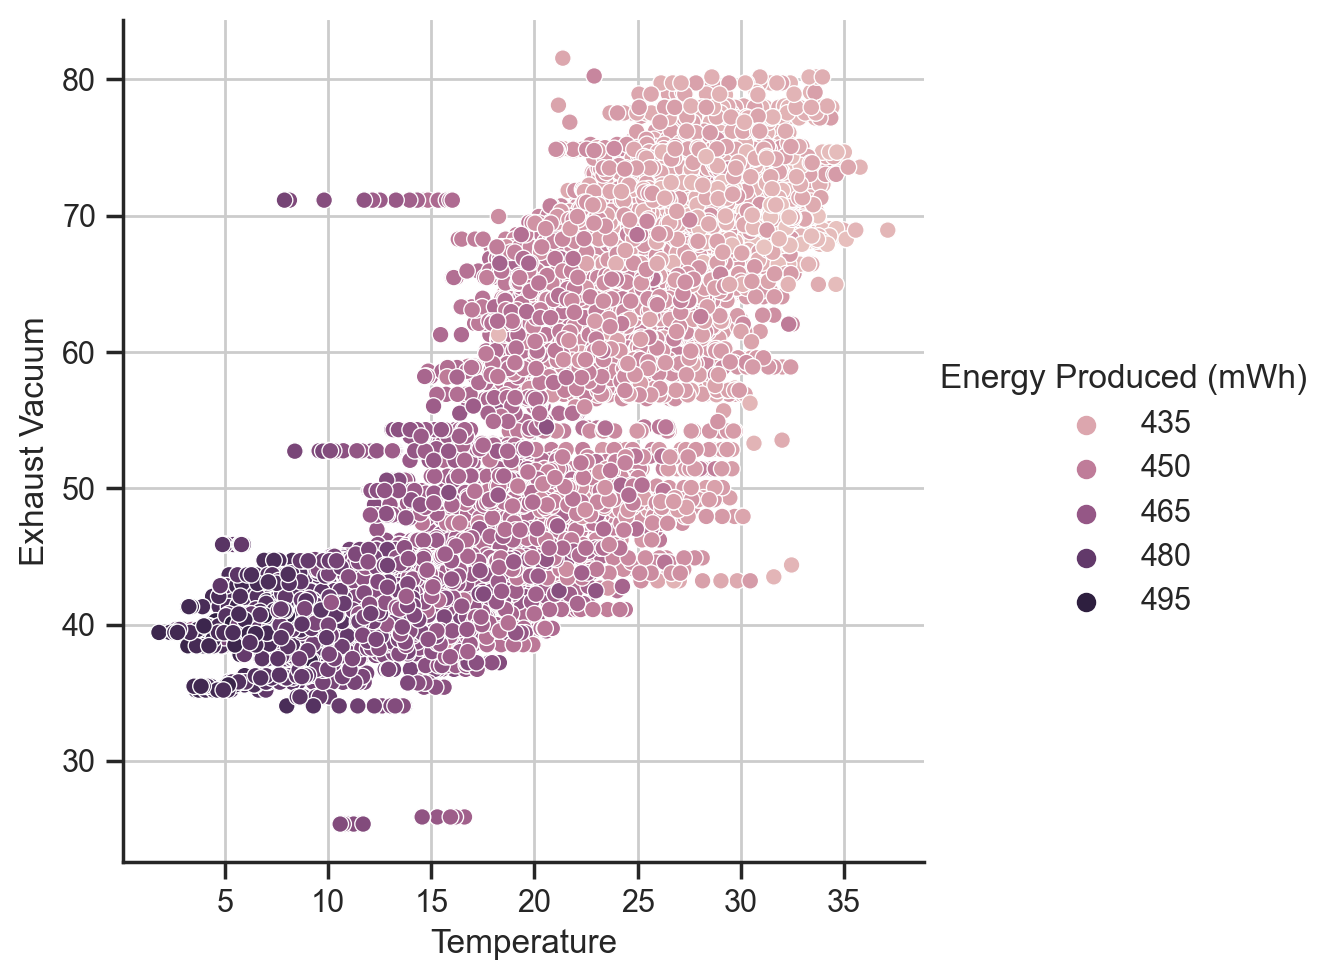

In [101]:
# Taking Exhaust vacuum in play too
sns.relplot(data=df,x='Temperature', y='Exhaust Vacuum',hue='Energy Produced (mWh)')
plt.grid(True)
plt.rcParams['figure.figsize'] = [18, 12]
plt.rcParams['figure.dpi'] = 200
plt.show()

In [5]:
# To sum up analysis part, when atmospheric temperature increases, exhaust vacuum increases (gets closer to atmospheric pressure).
# Exhaust vacuum is a direct efficiency parameter in power plants which effects net energy produced hourly.
# in This scenario tempreature increase is effecting the cooling water and the change in the energy of cooling water is correlated with Exhaust Vacuum

# So if we are going to create a model we can use temperature and exhaust vacuum as  features certainly (alongside with others)
# it would be great if we had cooling water temperature parameter too.

# Lets Create a linear regression model and check it's score

from sklearn.linear_model import LinearRegression

y = df['Energy Produced (mWh)']
X = df[['Temperature','Exhaust Vacuum','Atm. Pressure','Relative Humidty']]
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))

0.9284226238538386


In [69]:
# lets check Random Forest 
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=20, random_state=2) # increasing the depth to 14 
y = df['Energy Produced (mWh)']
X = df[['Temperature','Exhaust Vacuum','Atm. Pressure','Relative Humidty']]
regr.fit(X, y)
df['prediction'] = regr.predict(X)
print(regr.score(X,y))

0.9946968831340485


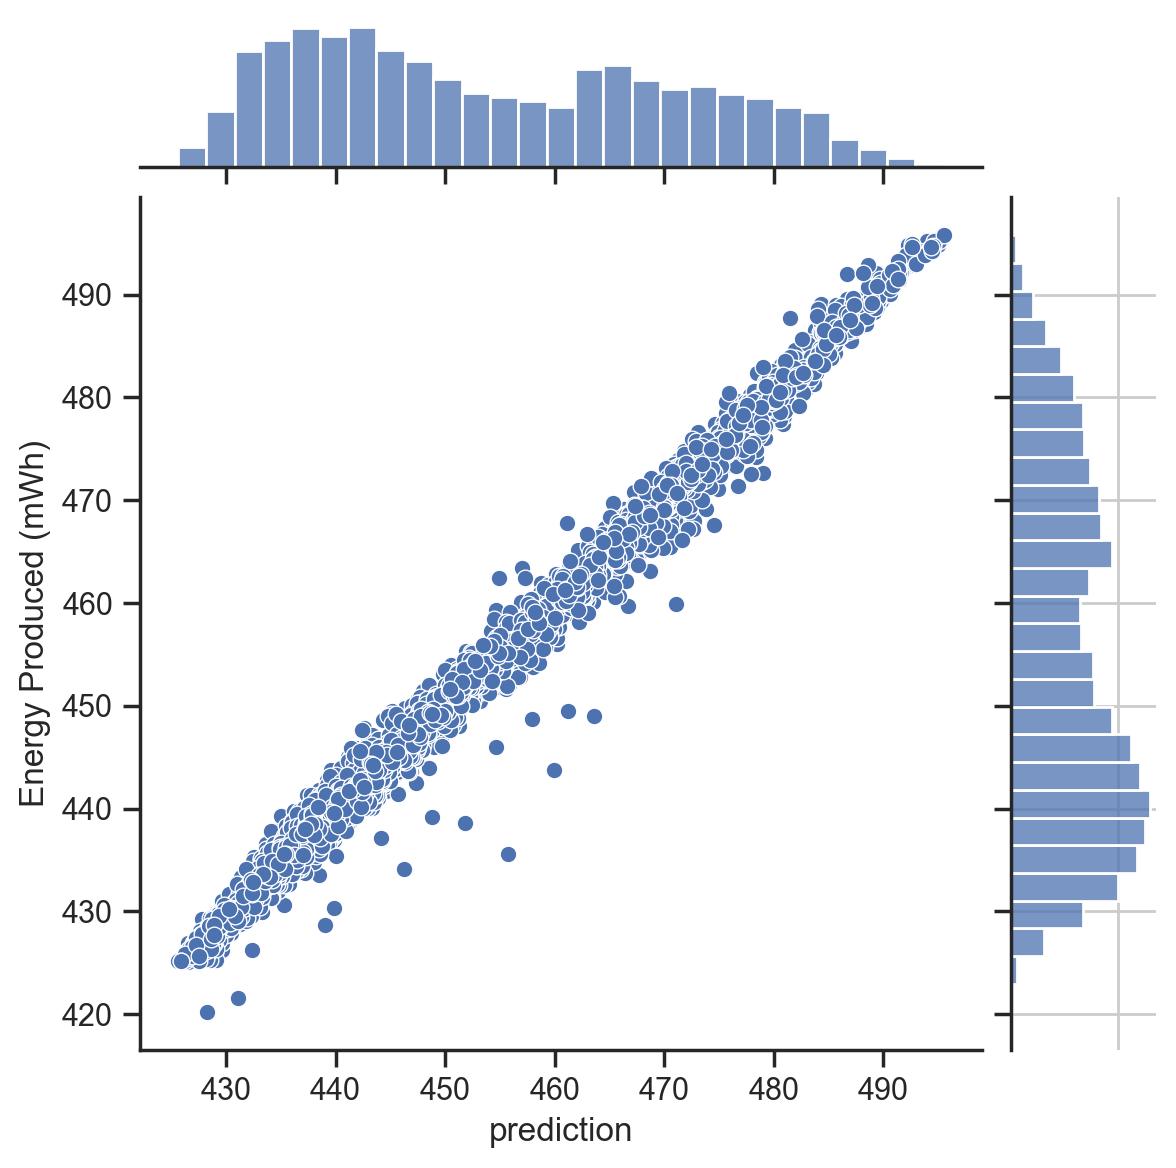

In [70]:
#sns.lineplot(x='Energy Produced (mWh)', y="predict")
sns.jointplot(data=df,x='prediction',y='Energy Produced (mWh)',edgecolor='white')
plt.grid(True)

plt.show()

In [43]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(df['Energy Produced (mWh)'], df['prediction'], squared=True)
print(rms)


1.5394936958119405
